# Assignment 3

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.datasets import make_moons
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import psutil
import pandas as pd
import time


class BlobsDataset(Dataset):
    def __init__(self, n_samples=1000, centers=[[0, 0], [3, 3]], cluster_std=0.6, random_state=42):
        X, y = make_blobs(n_samples=n_samples, centers=centers, 
                         cluster_std=cluster_std, random_state=random_state)
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class1train_dataset = BlobsDataset(n_samples=800)
class1test_dataset = BlobsDataset(n_samples=200, random_state=123)

class1train_loader = DataLoader(class1train_dataset, batch_size=32, shuffle=True)
class1test_loader = DataLoader(class1test_dataset, batch_size=32, shuffle=False)

In [ ]:
class MoonsDataset(Dataset):
    def __init__(self, n_samples=1000, noise=0.1, random_state=42):
        X, y = make_moons(n_samples=n_samples, noise=noise, 
                         random_state=random_state)
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


class2train_dataset = MoonsDataset(n_samples=800)
class2test_dataset = MoonsDataset(n_samples=200, random_state=123)

class2train_loader = DataLoader(class2train_dataset, batch_size=32, shuffle=True)
class2test_loader = DataLoader(class2test_dataset, batch_size=32, shuffle=False)

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


class3train_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
class3test_dataset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)

class3train_loader = torch.utils.data.DataLoader(
    class3train_dataset, batch_size=32, shuffle=True, num_workers=2)
class3test_loader = torch.utils.data.DataLoader(
    class3test_dataset, batch_size=32, shuffle=False, num_workers=2)


In [ ]:
class LinearDataset(Dataset):
    def __init__(self, n_samples=1000, slope=2.0, intercept=1.0, noise_std=0.3, x_range=(-5, 5), random_state=42):
        torch.manual_seed(random_state)
        x = torch.linspace(x_range[0], x_range[1], n_samples)
        noise = torch.randn(n_samples) * noise_std
        y = slope * x + intercept + noise
        
        self.X = x.unsqueeze(1)
        self.y = y.unsqueeze(1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


func1train_dataset = LinearDataset(n_samples=800)
func1test_dataset = LinearDataset(n_samples=200, random_state=123)

func1train_loader = DataLoader(func1train_dataset, batch_size=32, shuffle=True)
func1test_loader = DataLoader(func1test_dataset, batch_size=32, shuffle=False)

In [ ]:
class SineDataset(Dataset):
    def __init__(self, n_samples=1000, noise_std=0.1, x_range=(-1, 1), random_state=42):
        torch.manual_seed(random_state)
        x = torch.linspace(x_range[0], x_range[1], n_samples)
        noise = torch.randn(n_samples) * noise_std
        y = torch.sin(2 * np.pi * x) + noise
        
        self.X = x.unsqueeze(1)
        self.y = y.unsqueeze(1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


func2train_dataset = SineDataset(n_samples=800)
func2test_dataset = SineDataset(n_samples=200, random_state=123)

func2train_loader = DataLoader(func2train_dataset, batch_size=32, shuffle=True)
func2test_loader = DataLoader(func2test_dataset, batch_size=32, shuffle=False)

In [ ]:
class BostonHousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y).unsqueeze(1)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]




california = fetch_california_housing()
X, y = california.data, california.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

func3train_dataset = BostonHousingDataset(X_train_scaled, y_train)
func3test_dataset = BostonHousingDataset(X_test_scaled, y_test)

func3train_loader = DataLoader(func3train_dataset, batch_size=32, shuffle=True)
func3test_loader = DataLoader(func3test_dataset, batch_size=32, shuffle=False)

In [ ]:
class BasicNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size=64, output_size=1, activation='relu'):
        super(BasicNeuralNetwork, self).__init__()
        

        self.hidden = nn.Linear(input_size, hidden_size)
        

        self.output = nn.Linear(hidden_size, output_size)
        

        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        else:
            raise ValueError("Activation must be 'relu', 'sigmoid', or 'tanh'")
        
    def forward(self, x):

        if x.dim() > 2:
            x = x.view(x.size(0), -1)
            
        x = self.hidden(x)
        x = self.activation(x)
        x = self.output(x)
        return x

def train_model(model, train_loader, test_loader, num_epochs=100, learning_rate=0.01, verbose=True):

    criterion = nn.MSELoss() if model.output.out_features == 1 else nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    

    train_losses = []
    test_losses = []
    
    for epoch in range(num_epochs):

        model.train()
        train_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            

            if isinstance(criterion, nn.MSELoss):
                loss = criterion(output, target.float())
            else:
                loss = criterion(output, target)
                
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        

        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                if isinstance(criterion, nn.MSELoss):
                    loss = criterion(output, target.float())
                else:
                    loss = criterion(output, target)
                test_loss += loss.item()
        
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)
        
        if verbose and (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')
    
    return train_losses, test_losses

def evaluate_model(model, test_loader):

    model.eval()
    correct = 0
    total = 0
    test_loss = 0.0
    criterion = nn.MSELoss() if model.output.out_features == 1 else nn.CrossEntropyLoss()
    
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            

            if model.output.out_features == 1:
                test_loss += criterion(output, target.float()).item()

            else:
                test_loss += criterion(output, target).item()
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()
    
    if model.output.out_features == 1:
        print(f'Test Loss: {test_loss/len(test_loader):.4f}')
    else:
        accuracy = 100 * correct / total
        print(f'Test Loss: {test_loss/len(test_loader):.4f}, Accuracy: {accuracy:.2f}%')
    
    return test_loss / len(test_loader)



Epoch [10/100], Train Loss: 0.2393, Test Loss: 0.2770
Epoch [20/100], Train Loss: 0.2151, Test Loss: 0.2547
Epoch [30/100], Train Loss: 0.1713, Test Loss: 0.1983
Epoch [40/100], Train Loss: 0.1132, Test Loss: 0.1317
Epoch [50/100], Train Loss: 0.0748, Test Loss: 0.0862
Epoch [60/100], Train Loss: 0.0541, Test Loss: 0.0632
Epoch [70/100], Train Loss: 0.0414, Test Loss: 0.0482
Epoch [80/100], Train Loss: 0.0338, Test Loss: 0.0393
Epoch [90/100], Train Loss: 0.0293, Test Loss: 0.0332
Epoch [100/100], Train Loss: 0.0254, Test Loss: 0.0286
✅ Resource log saved to training_resource_log.csv
✅ Resource plot saved to resource_usage_plot.png
Test Loss: 0.0286, Accuracy: 100.00%


0.028638338004904135

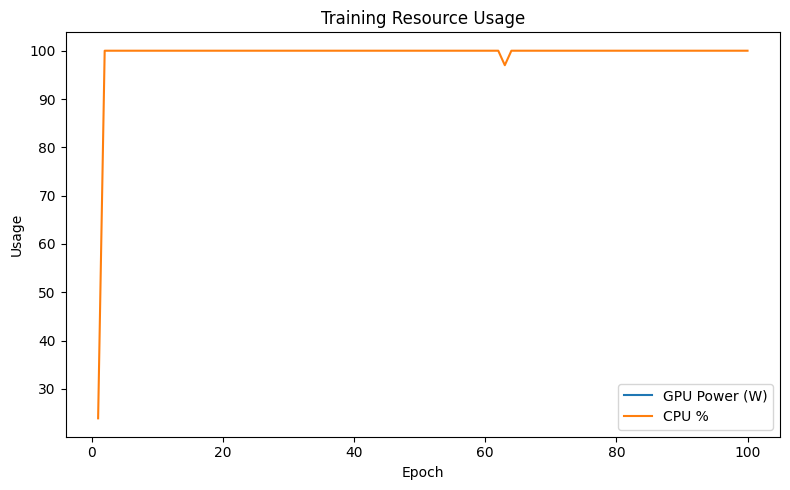

In [91]:


# model_blobs = BasicNeuralNetwork(input_size=2, hidden_size=64, output_size=2, activation='tanh')
# train_losses_blobs, test_losses_blobs = train_model(model_blobs, class1train_loader, class1test_loader, 
#                                         num_epochs=100, learning_rate=0.01)
# evaluate_model(model_blobs, class1test_loader)

model_moons = BasicNeuralNetwork(input_size=2, hidden_size=64, output_size=2, activation='tanh')
train_losses_moons, test_losses_moons = train_with_optimizer(model_moons, class2train_loader,  class2test_loader, 'sgd',
                                        num_epochs=100)
evaluate_model(model_moons, class2test_loader)

# model_cifar = BasicNeuralNetwork(input_size=32*32*3, hidden_size=64, output_size=10, activation='tanh')
# train_losses_cifar, test_losses_cifar = train_model(model_cifar, class3train_loader, class3test_loader, 
#                                         num_epochs=3, learning_rate=0.01)
# evaluate_model(model_cifar, class3test_loader)


# model_func1 = BasicNeuralNetwork(input_size=1, hidden_size=64, output_size=1, activation='tanh')
# train_losses_func1, test_losses_func1 = train_model(model_func1, func1train_loader, func1test_loader, 
#                                         num_epochs=100, learning_rate=0.01)
# evaluate_model(model_func1, func1test_loader)

# model_func2 = BasicNeuralNetwork(input_size=1, hidden_size=64, output_size=1, activation='tanh')
# train_losses_func2, test_losses_func2 = train_model(model_func2, func1train_loader, func2test_loader, 
#                                         num_epochs=100, learning_rate=0.01)
# evaluate_model(model_func2, func2test_loader)

# model_func3 = BasicNeuralNetwork(input_size=8, hidden_size=64, output_size=1, activation='tanh')
# train_losses_func3, test_losses_func3 = train_model(model_func3, func3train_loader, func3test_loader, 
#                                         num_epochs=3, learning_rate=0.01)
# evaluate_model(model_func3, func3test_loader)

# Plot training history for the last model
# plt.figure(figsize=(10, 6))
# plt.plot(train_losses, label='Training Loss')
# plt.plot(test_losses, label='Test Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training History')
# plt.legend()
# plt.show()

In [ ]:

class SGD:
    def __init__(self, model, lr=0.01, momentum=0.9):
        self.model = model
        self.lr = lr
        self.momentum = momentum
        self.velocity = {}
        for name, param in model.named_parameters():
            if param.requires_grad:
                self.velocity[name] = torch.zeros_like(param.data)
    
    def zero_grad(self):
        self.model.zero_grad()
    
    def step(self):
        with torch.no_grad():
            for name, param in self.model.named_parameters():
                if param.requires_grad and param.grad is not None:
                    # Momentum update
                    self.velocity[name] = self.momentum * self.velocity[name] + param.grad
                    param.data -= self.lr * self.velocity[name]


# =====================================
#SCALED CONJUGATE GRADIENT (SCG)
# ===================================

class SCG:
    def __init__(self, model, sigma=1e-4, lambda1=1e-6, eps=1e-12):

        self.model = model
        self.sigma = float(sigma)
        self.lambdak = float(lambda1)
        self.lambdak_bar = 0.0
        self.eps = float(eps)
        self.reset()

    def reset(self):

        self.success = True
        self.k = 1

        self._params = [p for p in self.model.parameters() if p.requires_grad]
        if len(self._params) == 0:
            raise ValueError("Model has no trainable parameters")
        self.device = self._params[0].device
        self.rk = None
        self.pk = None
        self.rk_prev = None
        self.delta_k = None

    def zero_grad(self):
        self.model.zero_grad()

    def _num_params(self):
        return sum(p.numel() for p in self._params)

    def _get_flat_params(self):
        parts = [p.data.view(-1).clone().to(self.device) for p in self._params]
        return torch.cat(parts) if parts else torch.tensor([], device=self.device)

    def _set_flat_params(self, flat):

        with torch.no_grad():
            offset = 0
            for p in self._params:
                n = p.numel()
                p.data.copy_(flat[offset:offset + n].view_as(p.data))
                offset += n

    def _get_flat_grad(self):
        parts = []
        for p in self._params:
            if p.grad is not None:
                parts.append(p.grad.view(-1).clone().to(self.device))
            else:
                parts.append(torch.zeros(p.numel(), device=self.device, dtype=p.data.dtype))
        return torch.cat(parts) if parts else torch.tensor([], device=self.device)

    def _compute_loss_and_grad(self, dataloader, criterion):

        total_loss = 0.0
        batch_count = 0
        self.model.train()
        for data, target in dataloader:
            data = data.to(self.device)
            target = target.to(self.device)
            with torch.no_grad():
                output = self.model(data)
                if isinstance(criterion, nn.MSELoss):
                    loss = criterion(output, target.float())
                else:
                    loss = criterion(output, target)
                total_loss += float(loss.item())
                batch_count += 1
        if batch_count == 0:
            raise ValueError("Dataloader is empty")
        avg_loss = total_loss / batch_count


        self.zero_grad()
        for data, target in dataloader:
            data = data.to(self.device)
            target = target.to(self.device)
            output = self.model(data)
            if isinstance(criterion, nn.MSELoss):
                loss = criterion(output, target.float())
            else:
                loss = criterion(output, target)

            (loss / batch_count).backward()

        return avg_loss

    def step(self, dataloader, criterion):

        if self.rk is None:
            loss = self._compute_loss_and_grad(dataloader, criterion)
            self.rk = self._get_flat_grad()
            self.pk = -self.rk.clone()
            return float(loss)

        if self.success:
            pk_norm = torch.norm(self.pk)
            sigma_k = self.sigma / (pk_norm + self.eps)
            current_params = self._get_flat_params()


            self._set_flat_params(current_params + sigma_k * self.pk)
            _ = self._compute_loss_and_grad(dataloader, criterion)
            grad_plus = self._get_flat_grad()


            self._set_flat_params(current_params)

            _ = self._compute_loss_and_grad(dataloader, criterion)

            sk = (grad_plus - self.rk) / sigma_k
            self.delta_k = torch.dot(self.pk, sk)


        pk_norm2 = (torch.norm(self.pk) ** 2)
        delta_k = self.delta_k - (self.lambdak - self.lambdak_bar) * pk_norm2


        if delta_k <= 0:
            self.lambdak_bar = 2.0 * (self.lambdak - delta_k / (pk_norm2 + self.eps))
            delta_k = -delta_k + self.lambdak * pk_norm2
            self.lambdak = self.lambdak_bar


        mu_k = torch.dot(self.pk, self.rk) 
        alpha_k = mu_k / (delta_k + self.eps)


        current_params = self._get_flat_params()
        current_loss = self._compute_loss_and_grad(dataloader, criterion)


        trial_params = (current_params + alpha_k * self.pk)
        self._set_flat_params(trial_params)
        new_loss = self._compute_loss_and_grad(dataloader, criterion)


        Delta_k = (2.0 * delta_k * (current_loss - new_loss)) / (mu_k * mu_k + self.eps)

        if Delta_k > 0.0:

            self.rk_prev = self.rk.clone()
            self.rk = self._get_flat_grad()
            self.lambdak_bar = 0.0
            self.success = True


            if (self.k % self._num_params()) == 0:
                self.pk = -self.rk.clone()
            else:
                r_diff = (self.rk - self.rk_prev)
                denom = torch.dot(self.pk, r_diff)
                if torch.abs(denom) < self.eps:

                    self.pk = -self.rk.clone()
                else:
                    beta_k = torch.dot(self.rk, r_diff) / (denom + self.eps)
                    self.pk = -self.rk + beta_k * self.pk


            if Delta_k >= 0.75:
                self.lambdak *= 0.25

            result_loss = float(new_loss)
        else:

            self._set_flat_params(current_params)
            self.lambdak_bar = self.lambdak
            self.success = False
            result_loss = float(current_loss)


        if Delta_k < 0.25:
            self.lambdak += float(delta_k * (1.0 - Delta_k) / (pk_norm2 + self.eps))

        self.k += 1
        return result_loss

# ================================
# LEAP FROG OPTIMIZER(LFOP)
# ====================================

class LFOP:
    def __init__(self, model, dt=0.5, delta=1.0, epsilon=1e-5, m=3, delta1=0.001):
        self.model = model
        self.dt = dt
        self.delta = delta
        self.epsilon = epsilon
        self.m = m
        self.delta1 = delta1
        

        self.v = {}
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                self.v[name] = torch.zeros_like(param.data)
        
        self.reset_counters()
    
    def reset_counters(self):
        self.i = 0
        self.j = 2
        self.s = 0
        self.p = 1
        self.k = 0
        self.consecutive_max_steps = 0
        self.consecutive_success_steps = 0
        self.prev_grad_norm = None
    
    def zero_grad(self):
        self.model.zero_grad()
    
    def step(self, dataloader, criterion):

        self.k += 1
        

        total_loss = 0.0
        batch_count = 0
        
        self.zero_grad()
        for data, target in dataloader:
            output = self.model(data)
            if isinstance(criterion, nn.MSELoss):
                loss = criterion(output, target.float())
            else:
                loss = criterion(output, target)
            total_loss += loss.item()
            batch_count += 1
            (loss / batch_count).backward()
        
        avg_loss = total_loss / batch_count
        

        x_prev = {}
        v_prev = {}
        a_prev = {}
        
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                x_prev[name] = param.data.clone()
                v_prev[name] = self.v[name].clone()
                a_prev[name] = -param.grad.clone() if param.grad is not None else torch.zeros_like(param.data)
        

        if self.k == 1:
            for name, param in self.model.named_parameters():
                if param.requires_grad:
                    self.v[name] = 0.5 * a_prev[name] * self.dt
            return avg_loss
        

        max_step_applied = False
        total_step_size = 0.0
        
        for name, param in self.model.named_parameters():
            if param.requires_grad:
                step_size = torch.norm(self.v[name] * self.dt).item()
                total_step_size += step_size
                if step_size >= self.delta:
                    max_step_applied = True
                    self.v[name] = (self.delta * self.v[name] / 
                                  (self.dt * torch.norm(self.v[name])))
        

        if not max_step_applied:
            self.p += self.delta1
            self.dt = self.p * self.dt
            self.consecutive_success_steps += 1
            self.consecutive_max_steps = 0
        else:
            self.consecutive_max_steps += 1
            self.consecutive_success_steps = 0
        
        if self.consecutive_max_steps >= self.m:

            self.dt /= 2
            for name, param in self.model.named_parameters():
                if param.requires_grad:
                    param.data = (param.data + x_prev[name]) / 2
                    self.v[name] = (self.v[name] + v_prev[name]) / 4
            self.consecutive_max_steps = 0
        

        with torch.no_grad():
            for name, param in self.model.named_parameters():
                if param.requires_grad:
                    param.data += self.v[name] * self.dt
        

        self.zero_grad()
        for data, target in dataloader:
            output = self.model(data)
            if isinstance(criterion, nn.MSELoss):
                loss = criterion(output, target.float())
            else:
                loss = criterion(output, target)
            (loss / batch_count).backward()
        

        dot_product_pos = True
        with torch.no_grad():
            for name, param in self.model.named_parameters():
                if param.requires_grad and param.grad is not None:
                    a_new = -param.grad.clone()
                    self.v[name] += a_new * self.dt
                    

                    if torch.dot(a_new.flatten(), a_prev[name].flatten()) <= 0:
                        self.s += 1
                        self.p = 1
                        dot_product_pos = False
                    else:
                        self.s = 0
        
        if dot_product_pos:
            self.s = 0
        

        grad_norm = 0.0
        for param in self.model.parameters():
            if param.requires_grad and param.grad is not None:
                grad_norm += torch.norm(param.grad).item()**2
        grad_norm = np.sqrt(grad_norm)
        
        if grad_norm <= self.epsilon:
            return avg_loss
        

        v_norm_new = 0.0
        v_norm_prev = 0.0
        for name in self.v:
            v_norm_new += torch.norm(self.v[name]).item()**2
            v_norm_prev += torch.norm(v_prev[name]).item()**2
        
        v_norm_new = np.sqrt(v_norm_new)
        v_norm_prev = np.sqrt(v_norm_prev)
        
        if v_norm_new > v_norm_prev:
            self.i = 0
        else:

            with torch.no_grad():
                for name, param in self.model.named_parameters():
                    if param.requires_grad:
                        param.data = (param.data + x_prev[name]) / 2
            
            self.i += 1
            
            if self.i <= self.j:

                for name in self.v:
                    self.v[name] = (self.v[name] + v_prev[name]) / 4
            else:

                for name in self.v:
                    self.v[name] = torch.zeros_like(self.v[name])
                self.j = 1
        
        return avg_loss

# ============================================================================
# UPDATED TRAINING FUNCTION
# ============================================================================



try:
    import pynvml
    pynvml.nvmlInit()
    NVML_AVAILABLE = True
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)  # first GPU
except:
    NVML_AVAILABLE = False
    print("⚠️ NVML not available – GPU stats won't be logged.")

def log_resources():

    cpu_usage = psutil.cpu_percent(interval=None)
    ram_usage = psutil.virtual_memory().used / (1024 ** 2)  # MB
    
    gpu_power = None
    gpu_util = None
    gpu_mem = None
    
    if NVML_AVAILABLE:
        power = pynvml.nvmlDeviceGetPowerUsage(handle) / 1000.0  # W
        util = pynvml.nvmlDeviceGetUtilizationRates(handle)
        meminfo = pynvml.nvmlDeviceGetMemoryInfo(handle)
        
        gpu_power = power
        gpu_util = util.gpu
        gpu_mem = meminfo.used / (1024 ** 2)  # MB
    
    return cpu_usage, ram_usage, gpu_power, gpu_util, gpu_mem


def train_with_optimizer(model, train_loader, test_loader, optimizer_type='sgd', 
                        num_epochs=100, verbose=True, log_resources_flag=True):

    if optimizer_type.lower() == 'sgd':
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
        requires_dataloader = False
    elif optimizer_type.lower() == 'scg':
        optimizer = SCG(model)
        requires_dataloader = True
    elif optimizer_type.lower() == 'lfop':
        optimizer = LFOP(model)
        requires_dataloader = True
    else:
        raise ValueError(f"Unknown optimizer type: {optimizer_type}")
    
    train_losses = []
    test_losses = []
    resource_log = []

    criterion = nn.MSELoss() if model.output.out_features == 1 else nn.CrossEntropyLoss()
    
    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        
        if requires_dataloader:
            if optimizer_type.lower() == 'scg':
                train_loss = optimizer.step(train_loader, criterion)
            elif optimizer_type.lower() == 'lfop':
                train_loss = optimizer.step(train_loader, criterion)
        else:
            train_loss = 0.0
            for batch_idx, (data, target) in enumerate(train_loader):
                optimizer.zero_grad()
                output = model(data)
                
                if isinstance(criterion, nn.MSELoss):
                    loss = criterion(output, target.float())
                else:
                    loss = criterion(output, target)
                
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            
            train_loss /= len(train_loader)
        
        train_losses.append(train_loss)
        

        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for data, target in test_loader:
                output = model(data)
                if isinstance(criterion, nn.MSELoss):
                    loss = criterion(output, target.float())
                else:
                    loss = criterion(output, target)
                test_loss += loss.item()
        
        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        if log_resources_flag:
            cpu, ram, gpu_power, gpu_util, gpu_mem = log_resources()
            elapsed = time.time() - start_time
            resource_log.append({
                "epoch": epoch+1,
                "train_loss": train_loss,
                "test_loss": avg_test_loss,
                "cpu_percent": cpu,
                "ram_MB": ram,
                "gpu_power_W": gpu_power,
                "gpu_util_percent": gpu_util,
                "gpu_mem_MB": gpu_mem,
                "time_sec": elapsed
            })
        
        if verbose and (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_loss:.4f}, '
                  f'Test Loss: {avg_test_loss:.4f}')
    

    if log_resources_flag:
        df = pd.DataFrame(resource_log)
        df.to_csv("training_resource_log.csv", index=False)
        print("✅ Resource log saved to training_resource_log.csv")
        

        plt.figure(figsize=(8,5))
        plt.plot(df["epoch"], df["gpu_power_W"], label="GPU Power (W)")
        plt.plot(df["epoch"], df["cpu_percent"], label="CPU %")
        plt.xlabel("Epoch")
        plt.ylabel("Usage")
        plt.legend()
        plt.title("Training Resource Usage")
        plt.tight_layout()
        plt.savefig("resource_usage_plot.png", dpi=300)
        print("✅ Resource plot saved to resource_usage_plot.png")
    
    return train_losses, test_losses


⚠️ NVML not available – GPU stats won't be logged.


In [ ]:
import matplotlib.pyplot as plt

def run_experiments(model_class, train_loader, test_loader, num_epochs=100, runs=5):

    optimizer_types = ["sgd", "scg", "lfop"]
    colors = {"sgd": "blue", "scg": "green", "lfop": "red"}  # consistent per optimizer

    all_results = {opt: [] for opt in optimizer_types}

    for opt in optimizer_types:
        print(f"\n=== Running {opt.upper()} {runs} times ===")
        for run in range(1, runs+1):
            print(f"  → Run {run}/{runs} with {opt.upper()}")
            
            # fresh model each run
            model = model_class(input_size=8, hidden_size=64, output_size=1, activation='tanh')
            
            train_losses, test_losses = train_with_optimizer(
                model,
                train_loader,
                test_loader,
                optimizer_type=opt,
                num_epochs=num_epochs,
                verbose=False,
                log_resources_flag=False 
            )
            
            all_results[opt].append((train_losses, test_losses))


    plt.figure(figsize=(8,6))
    for opt in optimizer_types:
        for run_losses, _ in all_results[opt]:
            plt.plot(run_losses, color=colors[opt], alpha=0.4, label=opt if run_losses == all_results[opt][0][0] else "")
    plt.xlabel("Epoch")
    plt.ylabel("Training Loss")
    plt.title("Training Loss over Runs")
    plt.legend()
    plt.tight_layout()
    plt.savefig("all_training_losses.png", dpi=300)
    print("✅ Saved plot to all_training_losses.png")


    plt.figure(figsize=(8,6))
    for opt in optimizer_types:
        for _, run_losses in all_results[opt]:
            plt.plot(run_losses, color=colors[opt], alpha=0.4, label=opt if run_losses == all_results[opt][0][1] else "")
    plt.xlabel("Epoch")
    plt.ylabel("Test Loss")
    plt.title("Test Loss over Runs")
    plt.legend()
    plt.tight_layout()
    plt.savefig("all_test_losses.png", dpi=300)
    print("✅ Saved plot to all_test_losses.png")

    return all_results



=== Running SGD 5 times ===
  → Run 1/5 with SGD
  → Run 2/5 with SGD
  → Run 3/5 with SGD
  → Run 4/5 with SGD
  → Run 5/5 with SGD

=== Running SCG 5 times ===
  → Run 1/5 with SCG
  → Run 2/5 with SCG
  → Run 3/5 with SCG
  → Run 4/5 with SCG
  → Run 5/5 with SCG

=== Running LFOP 5 times ===
  → Run 1/5 with LFOP
  → Run 2/5 with LFOP
  → Run 3/5 with LFOP
  → Run 4/5 with LFOP
  → Run 5/5 with LFOP
✅ Saved plot to all_training_losses.png
✅ Saved plot to all_test_losses.png


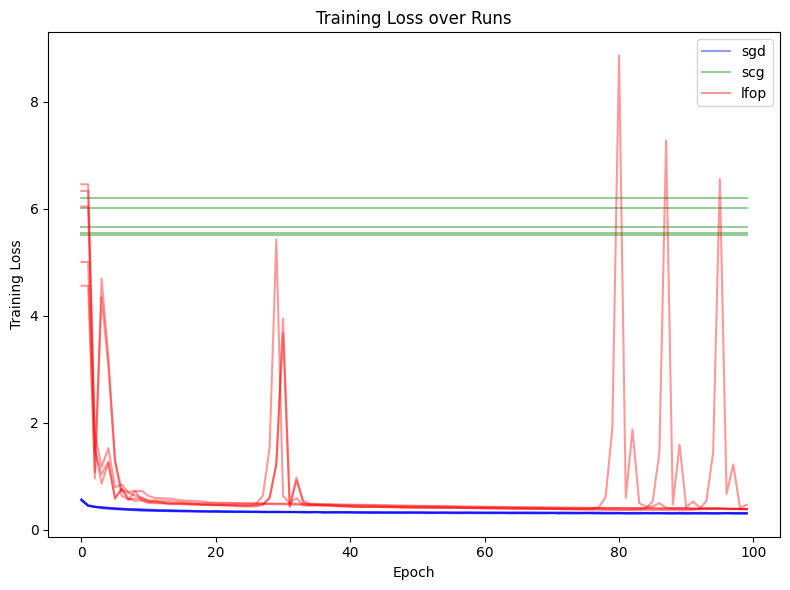

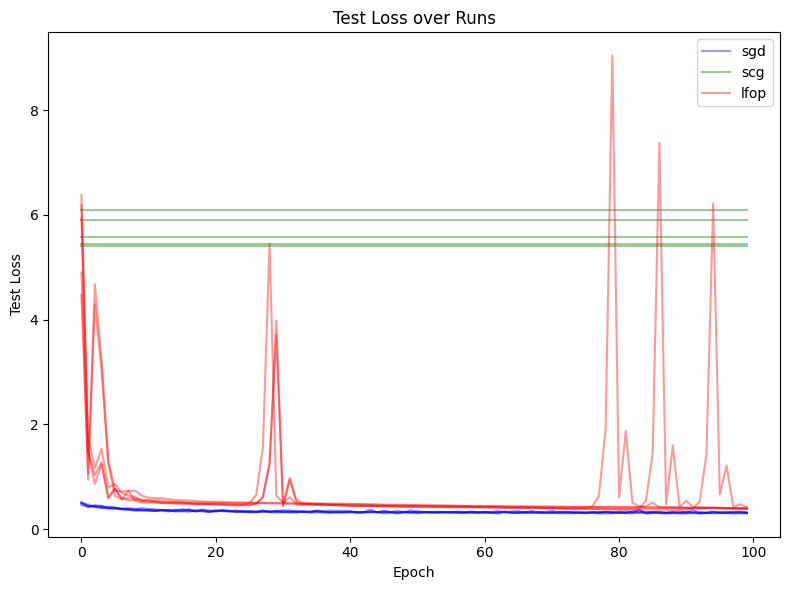

In [ ]:

results = run_experiments(
    BasicNeuralNetwork,
    func3train_loader,
    func3test_loader,
    num_epochs=100,
    runs=5
)


sgd_first_run_losses = results["sgd"][0][0]